In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

# Chemin vers le répertoire dans lequel vous voulez
datasets_dir = '/content/drive/MyDrive/classification d\'image/projet/classification project/datasets'
# Créer le répertoire s'il n'existe pas encore

os.makedirs(datasets_dir, exist_ok=True)

# Télécharger et decompresser le dataset dans le bon répertoire
get_ipython().system(' wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz -P "{datasets_dir}"')

get_ipython().system(' tar -xvf "{datasets_dir}/flower_photos.tgz" -C "{datasets_dir}"')


--2024-10-11 11:59:01--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘/content/drive/MyDrive/classification d'image/projet/classification project/datasets/flower_photos.tgz.2’

flower_photos.tgz.2 100%[===================>] 218.21M  38.3MB/s    in 5.8s    

2024-10-11 11:59:07 (37.6 MB/s) - ‘/content/drive/MyDrive/classification d'image/projet/classification project/datasets/flower_photos.tgz.2’ saved [228813984/228813984]

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/1503

In [5]:
import os
import shutil
import random
source_dir='/content/drive/MyDrive/classification d\'image/projet/classification project/datasets/flower_photos'
train_dir='/content/drive/MyDrive/classification d\'image/projet/classification project/datasets/train'
val_dir='/content/drive/MyDrive/classification d\'image/projet/classification project/datasets/val'
os.makedirs(train_dir,exist_ok=True)
os.makedirs(val_dir,exist_ok=True)
classes =['roses','tulips','daisy','sunflowers','dandelion']
#Fonction pour répartir les images en ensembles d'entraînement et de validation
def split_data(source_dir, train_dir, val_dir, split_ratio=0.8):
    for class_name in classes:
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        class_dir = os.path.join(source_dir, class_name)
        images = os.listdir(class_dir) #This line had an error, so I fixed it
        random.shuffle(images)
        train_size = int(len(images) * split_ratio) #This line had an error, so I fixed it
        train_images = images[:train_size]
        val_images= images[train_size:]
        for img in train_images:
            shutil.move(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
        for img in val_images:
            shutil.move(os.path.join(class_dir, img), os.path.join(val_dir, class_name, img))


# Appel de la fonction pour organiser les images

split_data(source_dir, train_dir, val_dir)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemins vers les répertoires d'entrainement et de validation
train_dir = '/content/drive/MyDrive/classification d\'image/projet/classification project/datasets/train'
val_dir='/content/drive/MyDrive/classification d\'image/projet/classification project/datasets/val'

# Création des générateurs d'images pour l'entraînement et la validation
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalisation
    rotation_range=40, # Augmentation des données rotation jusqu'à 40 degrés
    width_shift_range=0.2, # Décalage horizontal
    height_shift_range=0.2, # Décalage vertical
    shear_range=0.2, # Cisaillement
    zoom_range=0.2, # Zoom
    horizontal_flip=True, # Flip horizontal
    fill_mode='nearest' # Remplissage des pixels vides après transformation
)



# Chargement des images à partir des répertoires
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # Redimensionner les images à 150x150
    batch_size=32, # Nombre d'images par batch
    class_mode='categorical' # Pour la classification multi-classes
)
val_datagen = ImageDataGenerator(rescale=1./255) # Seulement la normalisation pour les données de validation
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150), #Redimensionner les images à 150*150
    batch_size=32, #Nombre d'images par batch
    class_mode='categorical' #Mode de classification multiclasse
)

Found 3641 images belonging to 5 classes.
Found 1792 images belonging to 5 classes.


In [7]:
from tensorflow.keras import layers, models

#Définir un modele CNN
model = models.Sequential()

#Ajouter des couches convolutionnelles et pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Ajouter des couches fully connected
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
#Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,455,173 (13.18 MB)

 Trainable params: 3,455,173 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Entraînement du modele

history =model.fit(
    train_generator, #Données d'entraînement

    epochs=30, #Nombre d'époques
    validation_data=val_generator, #Données de validation

)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.3102 - loss: 1.4910 - val_accuracy: 0.4633 - val_loss: 1.1838
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.5365 - loss: 1.1077 - val_accuracy: 0.5897 - val_loss: 0.9880
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.6152 - loss: 0.9549 - val_accuracy: 0.6101 - val_loss: 0.9811
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.6249 - loss: 0.9152 - val_accuracy: 0.6916 - val_loss: 0.7832
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.6455 - loss: 0.8982 - val_accuracy: 0.6766 - val_loss: 0.8313
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.6986 - loss: 0.7933 - val_accuracy: 0.6739 - val_loss: 0.8653
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6890 - loss: 0.8135 - val_accuracy: 0.7011 - val_loss: 0.7884
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.7022 - loss: 0.7897 - val_accuracy: 0.7323 - val_loss: 0.

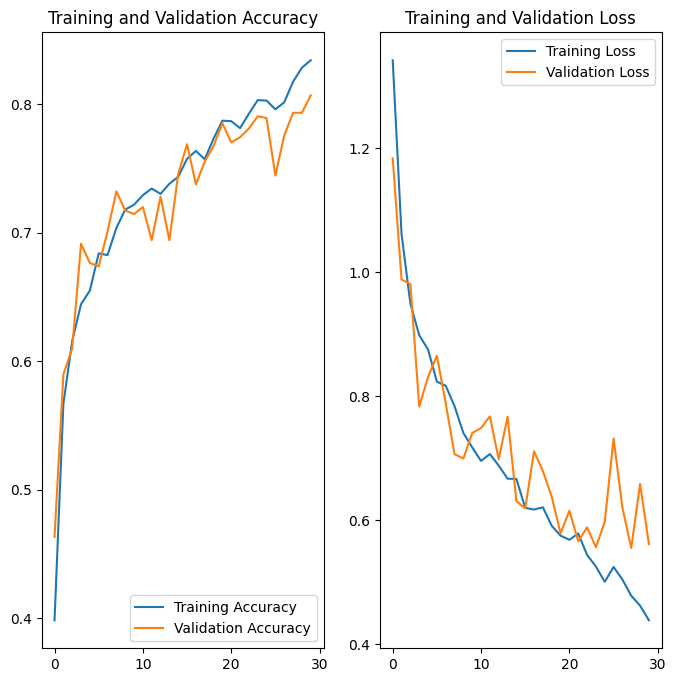

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=30
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:

history =model.fit(
    train_generator, #Données d'entraînement

    epochs=10, #Nombre d'époques
    validation_data=val_generator, #Données de validation

)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 611s 5s/step - accuracy: 0.3602 - loss: 1.3885 - val_accuracy: 0.5859 - val_loss: 0.9925
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.5792 - loss: 1.0580 - val_accuracy: 0.6356 - val_loss: 0.9709
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.6061 - loss: 0.9801 - val_accuracy: 0.6842 - val_loss: 0.8146
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.6709 - loss: 0.8255 - val_accuracy: 0.6864 - val_loss: 0.7743
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.6914 - loss: 0.8088 - val_accuracy: 0.7098 - val_loss: 0.7476
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.6991 - loss: 0.7892 - val_accuracy: 0.7411 - val_loss: 0.6752
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.7160 - loss: 0.7444 - val_accuracy: 0.7288 - val_loss: 0.6961
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.7197 - loss: 0.7246 - val_accuracy: 0.732

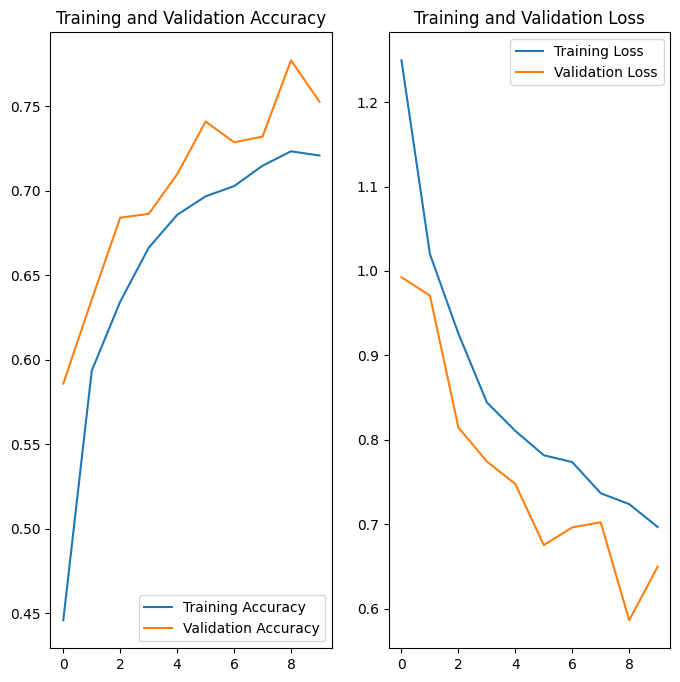

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=10 #change this to 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Enregistrer le modèle de machine learning
Sur Google Colab, assurez-vous de sauvegarder votre modèle. Utilisez des formats comme joblib ou pickle pour faciliter la réutilisation du modèle dans votre application Streamlit.

In [12]:
import joblib

# Entraînez votre modèle
# model = ...

# Sauvegarder le modèle
joblib.dump(model, 'model.pkl')


['model.pkl']

Créer l'application Streamlit
Installez Streamlit si ce n'est pas déjà fait :

In [13]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.5 MB/s eta 0:00:00
